In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns
# 주피터 사용시 그래프자동출력 옵션
matplotlib.rc('font', family ='Malgun Gothic')

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# matplotlib  패키지 한글 깨짐 처리
# 한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g7AM4qjnofXWkDHCAd8whYDCyeH7-V-RnSSpCSGMdFiXDBDpizq5YI


## 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_request.csv', engine = 'python', encoding ='EUC-KR')
df

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,req_id_seq,sick_main,sick_1st,sick_2nd,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,1,S02,S02,NaN,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498.0,18-Nov-15,11,1320000
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,3,S92,S92,NaN,NaN,외래,17-Feb-16,17-Feb-16,1,34950,490079.0,13-Mar-16,15,1800000
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,4,S92,S92,NaN,NaN,외래,24-Feb-16,24-Feb-16,1,0,490079.0,13-Mar-16,15,1800000
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,8,S92,S92,NaN,NaN,외래,02-Mar-16,02-Mar-16,1,0,490079.0,13-Mar-16,15,1800000
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,9,S92,S92,NaN,NaN,외래,09-Mar-16,09-Mar-16,1,16000,490079.0,13-Mar-16,15,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,1,J45,J45,NaN,NaN,외래,25-Sep-17,25-Sep-17,1,19100,140900.0,06-Jun-18,33,1650000
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,2,J45,J45,NaN,NaN,외래,25-Sep-17,25-Sep-17,1,42970,140900.0,06-Jun-18,33,1650000
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,3,J45,J45,NaN,NaN,외래,20-Nov-17,20-Nov-17,1,31200,140900.0,06-Jun-18,33,1650000
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,5,J45,J45,NaN,NaN,외래,13-Dec-17,13-Dec-17,1,33200,140900.0,06-Jun-18,33,1650000


In [ ]:
df_na =df[df['insu_pay_amount'].isna()]
df_na

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,req_id_seq,sick_main,sick_1st,sick_2nd,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
458,C113058,혈액검사,재검,1,61,INS-14063,25-Jan-15,PR-20069,건강보험,C113058-20100913-10514-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,19-Oct-15,19-Oct-15,1,0,NaN,19-Oct-15,9,900000
921,C113295,혈액검사,승인,1,59,INS-13471,27-Nov-14,PR-20069,건강보험,C113295-20101109-17513-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,23-Nov-15,23-Nov-15,1,0,NaN,23-Nov-15,12,1200000
1325,C113511,혈액검사,재검,1,59,INS-13343,12-Nov-14,PR-20069,건강보험,C113511-20120629-11925-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,30-Aug-17,30-Aug-17,1,0,NaN,30-Aug-17,33,3300000
1629,C113724,혈액검사,승인,1,60,INS-20374,26-Mar-15,PR-20569,조심조심 보험 4,C113724-20120224-14058-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,18-Mar-17,18-Mar-17,1,0,NaN,18-Mar-17,24,960000
1963,C113953,혈액검사,승인,1,59,INS-14285,18-Feb-15,PR-20606,단체보험(상해),C113953-20100712-17303-01-001,1,R42,R42,NaN,NaN,외래,01-Aug-15,01-Aug-15,1,0,NaN,01-Aug-15,6,2400000
1965,C113954,혈액검사,승인,1,59,INS-21145,27-Sep-15,PR-20569,조심조심 보험 4,C113954-20110328-15469-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,24-Apr-16,24-Apr-16,1,0,NaN,24-Apr-16,7,280000
2612,C114408,일반검진,재검,1,58,INS-20736,16-Jun-15,PR-20569,조심조심 보험 4,C114408-20110603-13906-01-001,1,E04,E049,NaN,NaN,외래,12-Jul-16,12-Jul-16,1,0,NaN,12-Jul-16,13,520000
2664,C114449,혈액검사,재검,1,57,INS-13802,29-Dec-14,PR-20069,건강보험,C114449-20101105-11376-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,30-Nov-15,30-Nov-15,1,0,NaN,30-Nov-15,11,1100000
3602,C115129,혈액검사,승인,1,56,INS-14884,20-Apr-15,PR-20083,울라트 보험,C115129-20100719-16557-01-001,1,ZZZ,ZZZ,NaN,NaN,외래,03-Aug-15,03-Aug-15,1,0,NaN,03-Aug-15,4,880000
3870,C115391,혈액검사,재검,1,55,INS-21028,29-Aug-15,PR-20569,조심조심 보험 4,C115391-20110623-11333-02-001,1,C73,C73,NaN,NaN,외래,17-Aug-16,17-Aug-16,1,0,NaN,17-Aug-16,12,480000


In [ ]:
df.isna().sum()

customer_id               0
review_cat                0
judge                     0
gender                    0
age                       0
insu_id                   0
insu_contract_date        0
insu_prod_id              0
insu_prod_name            0
req_id                    0
req_id_seq                0
sick_main                 0
sick_1st                  0
sick_2nd              37949
sick_3rd              44605
dg_cat                    0
dg_start_date             0
dg_end_date               0
dg_duration               0
insu_req_amount           0
insu_pay_amount          52
insu_pay_date             0
insu_duration             0
insu_cum_amount           0
dtype: int64

In [ ]:
df = df.dropna(subset =['insu_pay_amount'])
df.isna().sum()

customer_id               0
review_cat                0
judge                     0
gender                    0
age                       0
insu_id                   0
insu_contract_date        0
insu_prod_id              0
insu_prod_name            0
req_id                    0
req_id_seq                0
sick_main                 0
sick_1st                  0
sick_2nd              37906
sick_3rd              44556
dg_cat                    0
dg_start_date             0
dg_end_date               0
dg_duration               0
insu_req_amount           0
insu_pay_amount           0
insu_pay_date             0
insu_duration             0
insu_cum_amount           0
dtype: int64

## 청구금액, 지급금액 customer id 로 그룹화

In [ ]:
# df['p_sick'] =df['sick_main'].apply(lambda x : x[0])
df_id= df.groupby(['customer_id','req_id'])
df_req = df.groupby(['customer_id','req_id'])[['insu_req_amount']].sum()
df_pay = df.groupby(['customer_id','req_id'])[['insu_pay_amount']].mean()
df_cum = df.groupby(['customer_id','req_id'])[['insu_cum_amount']].max()
df_dur = df.groupby(['customer_id','req_id'])[['insu_duration']].max()
# df_kin = df.groupby(['customer_id','req_id','p_sick'])[['insu_prod_name']].max()


In [ ]:
df_all =pd.merge(df_req, df_pay, on = ['customer_id','req_id'])
df_all =pd.merge(df_all, df_cum, on = ['customer_id','req_id'])
df_all =pd.merge(df_all, df_dur, on = ['customer_id','req_id'])
# df_all =pd.merge(df_all, df_kin, on = ['customer_id','req_id','p_sick','insu_prod_name'])

In [ ]:
df_all.head(10)

insu_req_amount  ...  insu_duration
customer_id req_id                                          ...               
C112379     C112379-20101118-12660-01-001           424498  ...             11
            C112379-20110314-17403-01-001           198600  ...             15
C112404     C112404-20100831-12754-01-001           808750  ...              5
C112411     C112411-20101111-18755-01-001           333680  ...              2
C112570     C112570-20100730-10580-01-001           412210  ...              3
            C112570-20130716-13737-01-001          2350069  ...             39
C112727     C112727-20120813-20372-01-001           201880  ...             26
C112730     C112730-20110804-15908-01-001            50160  ...             12
            C112730-20110831-13010-01-001           254490  ...             12
            C112730-20120628-16359-01-001          1236256  ...             22

[10 rows x 4 columns]

In [ ]:
df_all.reset_index(level = ['customer_id','req_id'], inplace =True)

In [ ]:
df_all.head(15)

,customer_id,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration
0,C112379,C112379-20101118-12660-01-001,424498,724498.0,1320000,11
1,C112379,C112379-20110314-17403-01-001,198600,490079.0,1800000,15
2,C112404,C112404-20100831-12754-01-001,808750,1008750.0,600000,5
3,C112411,C112411-20101111-18755-01-001,333680,553680.0,240000,2
4,C112570,C112570-20100730-10580-01-001,412210,412210.0,375000,3
5,C112570,C112570-20130716-13737-01-001,2350069,2440069.0,4875000,39
6,C112727,C112727-20120813-20372-01-001,201880,201880.0,3250000,26
7,C112730,C112730-20110804-15908-01-001,50160,50160.0,1440000,12
8,C112730,C112730-20110831-13010-01-001,254490,254490.0,1440000,12
9,C112730,C112730-20120628-16359-01-001,1236256,1236256.0,2640000,22


In [ ]:
df1 = df_all.groupby(['customer_id'])['req_id'].max()
df2 = df_all.groupby(['customer_id'])['insu_req_amount'].sum()
df3 = df_all.groupby(['customer_id'])['insu_pay_amount'].sum()
df4 = df_all.groupby(['customer_id'])['insu_cum_amount'].max()
df5 = df_all.groupby(['customer_id'])['insu_duration'].max()



In [ ]:
df_all1 =pd.merge(df1,df2, on = ['customer_id'])
df_all1 =pd.merge(df_all1, df3, on = ['customer_id'])
df_all1 =pd.merge(df_all1, df4, on = ['customer_id'])
df_all1 =pd.merge(df_all1, df5, on = ['customer_id'])
# df_all1 =pd.merge(df_all1, df6, on = ['customer_id'])
# df_all1 =pd.merge(df_all1, df7, on = 'customer_id')

In [ ]:
df_all1.head()

,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration
customer_id,,,,,
C112379,C112379-20110314-17403-01-001,623098,1214577.0,1800000,15
C112404,C112404-20100831-12754-01-001,808750,1008750.0,600000,5
C112411,C112411-20101111-18755-01-001,333680,553680.0,240000,2
C112570,C112570-20130716-13737-01-001,2762279,2852279.0,4875000,39
C112727,C112727-20120813-20372-01-001,201880,201880.0,3250000,26


In [ ]:
df_all1['customer_cost'] = (df_all1['insu_req_amount'] - df_all1['insu_pay_amount'])/ (df_all1['insu_req_amount'])

## 고객 청구 금액이 0인 경우

In [ ]:
df_zero= df_all1[df_all1['insu_req_amount']== 0]
df_zero

,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost
customer_id,,,,,,
C112899,C112899-20130405-10628-01-001,0,5000000.0,6820000,31,-inf
C112915,C112915-20130822-16206-01-001,0,100000.0,7700000,35,-inf
C112928,C112928-20100303-19898-01-001,0,200000.0,400000,4,-inf
C112966,C112966-20120710-19862-01-001,0,200000.0,1280000,32,-inf
C112986,C112986-20100802-19401-01-001,0,200000.0,360000,9,-inf
...,...,...,...,...,...,...
C132759,C132759-20110916-20196-01-001,0,1200000.0,2200000,22,-inf
C132821,C132821-20110412-19792-01-001,0,200000.0,2860000,13,-inf
C132957,C132957-20130405-16406-01-001,0,100000.0,7040000,32,-inf


In [ ]:
df_zero['insu_pay_amount'].describe()

count    4.770000e+02
mean     1.133858e+06
std      6.486067e+06
min      3.000000e+04
25%      2.000000e+05
50%      2.000000e+05
75%      4.000000e+05
max      1.000000e+08
Name: insu_pay_amount, dtype: float64

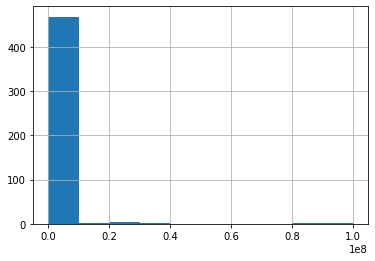

In [ ]:
df_zero['insu_pay_amount'].hist()

In [ ]:
df_zero['insu_pay_amount'].hist()

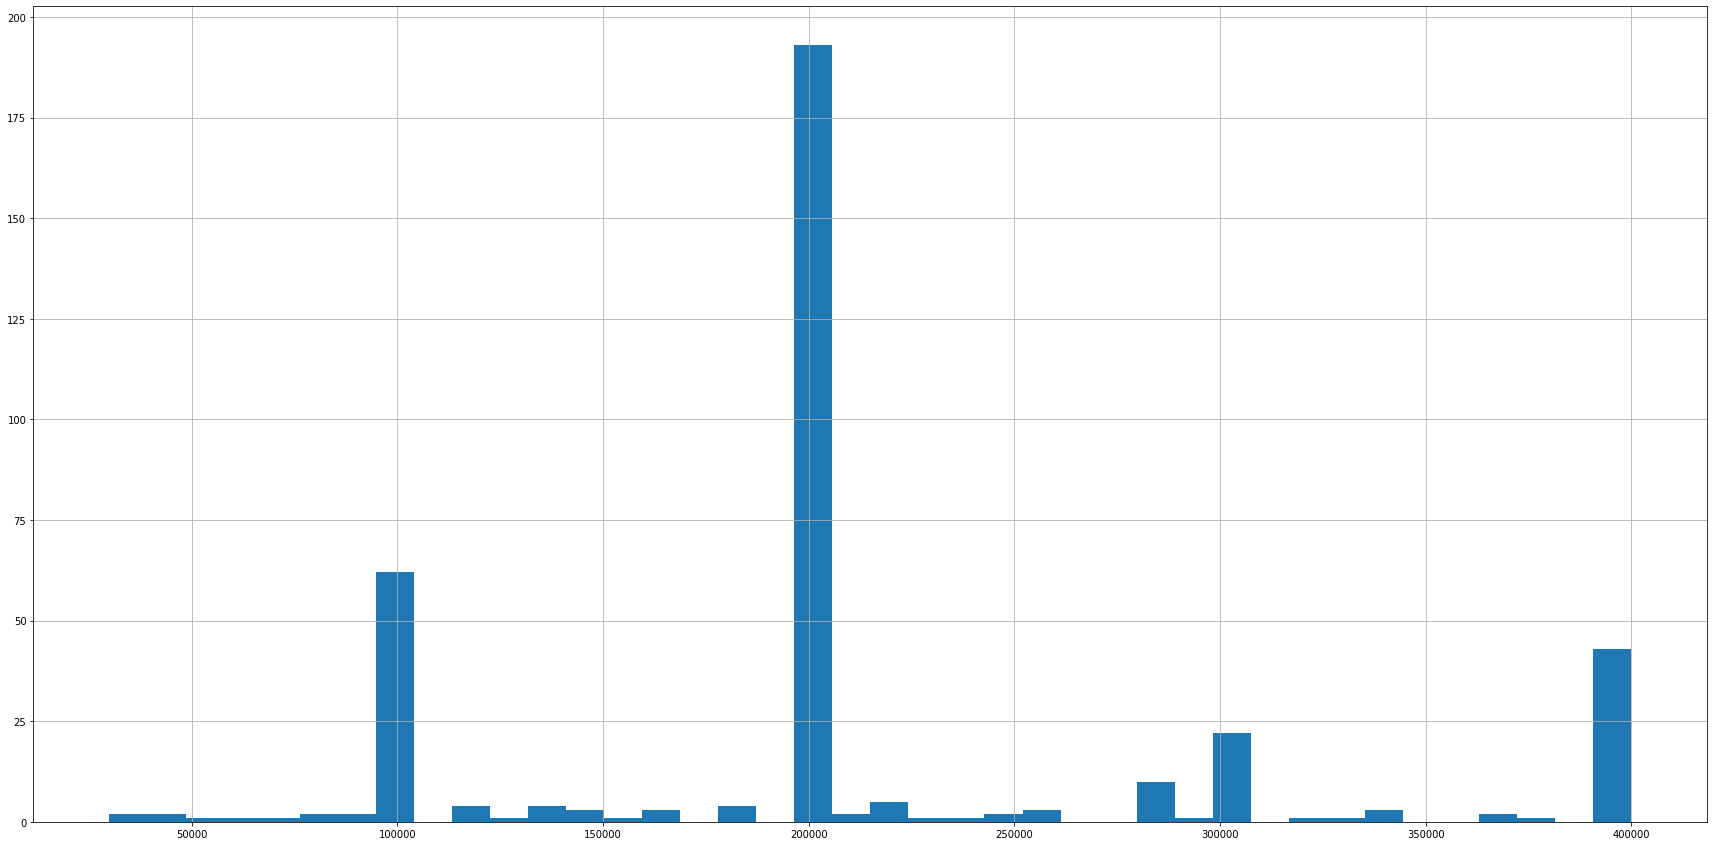

In [ ]:
df_zero['insu_pay_amount'].hist(figsize=(30,15),range = (3.000000e+04,4.000000e+05), bins = 40)

In [ ]:
2.000000e+05

200000.0

In [ ]:
df_zero_low = df_zero[df_zero['insu_pay_amount'] > 200000]
df_zero_low['risk'] = 1
df_zero_low

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
customer_id,,,,,,,
C112899,C112899-20130405-10628-01-001,0,5000000.0,6820000,31,-inf,1
C113107,C113107-20100325-18666-01-001,0,280000.0,0,0,-inf,1
C113219,C113219-20110427-19228-01-001,0,400000.0,950000,19,-inf,1
C113308,C113308-20110807-10014-01-001,0,550000.0,5060000,23,-inf,1
C113414,C113414-20111021-19179-01-001,0,620000.0,800000,20,-inf,1
...,...,...,...,...,...,...,...
C132114,C132114-20110907-20401-01-001,0,1150000.0,2300000,23,-inf,1
C132370,C132370-20111213-13300-01-001,0,220000.0,3960000,18,-inf,1
C132412,C132412-20130131-17940-01-001,0,760000.0,3900000,39,-inf,1


In [ ]:
df_zero_high = df_zero[df_zero['insu_pay_amount'] < 200000]
df_zero_high['risk'] = 0
df_zero_high

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
customer_id,,,,,,,
C112915,C112915-20130822-16206-01-001,0,100000.0,7700000,35,-inf,0
C113429,C113429-20100608-20385-02-001,0,160000.0,200000,5,-inf,0
C113461,C113461-20110812-18984-01-001,0,156243.0,800000,20,-inf,0
C113763,C113763-20120719-14690-02-001,0,100000.0,1840000,23,-inf,0
C113886,C113886-20110310-10542-01-001,0,100000.0,1500000,15,-inf,0
...,...,...,...,...,...,...,...
C132153,C132153-20130916-21960-01-001,0,100000.0,4300000,43,-inf,0
C132156,C132156-20111012-13729-01-001,0,100000.0,3520000,16,-inf,0
C132515,C132515-20130520-14084-02-001,0,100000.0,7040000,32,-inf,0


In [ ]:
df_zero_risk =pd.merge(df_zero_high,df_zero_low, on =['customer_id', 'req_id', 'insu_req_amount', 'insu_pay_amount',
       'insu_cum_amount', 'insu_duration', 'customer_cost', 'risk'], how = 'outer')
df_zero_risk

,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
customer_id,,,,,,,
C112915,C112915-20130822-16206-01-001,0,100000.0,7700000,35,-inf,0
C113429,C113429-20100608-20385-02-001,0,160000.0,200000,5,-inf,0
C113461,C113461-20110812-18984-01-001,0,156243.0,800000,20,-inf,0
C113763,C113763-20120719-14690-02-001,0,100000.0,1840000,23,-inf,0
C113886,C113886-20110310-10542-01-001,0,100000.0,1500000,15,-inf,0
...,...,...,...,...,...,...,...
C132114,C132114-20110907-20401-01-001,0,1150000.0,2300000,23,-inf,1
C132370,C132370-20111213-13300-01-001,0,220000.0,3960000,18,-inf,1
C132412,C132412-20130131-17940-01-001,0,760000.0,3900000,39,-inf,1


In [ ]:
df_zero_risk.groupby('risk').count()

,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost
risk,,,,,,
0,93,93,93,93,93,93
1,191,191,191,191,191,191


## 고객 청구 금액이 0이 아닌경우

In [ ]:
df_not_zero = df_all1[df_all1['insu_req_amount']!= 0]
df_not_zero
df_not_zero.reset_index(level = ['customer_id'], inplace =True)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


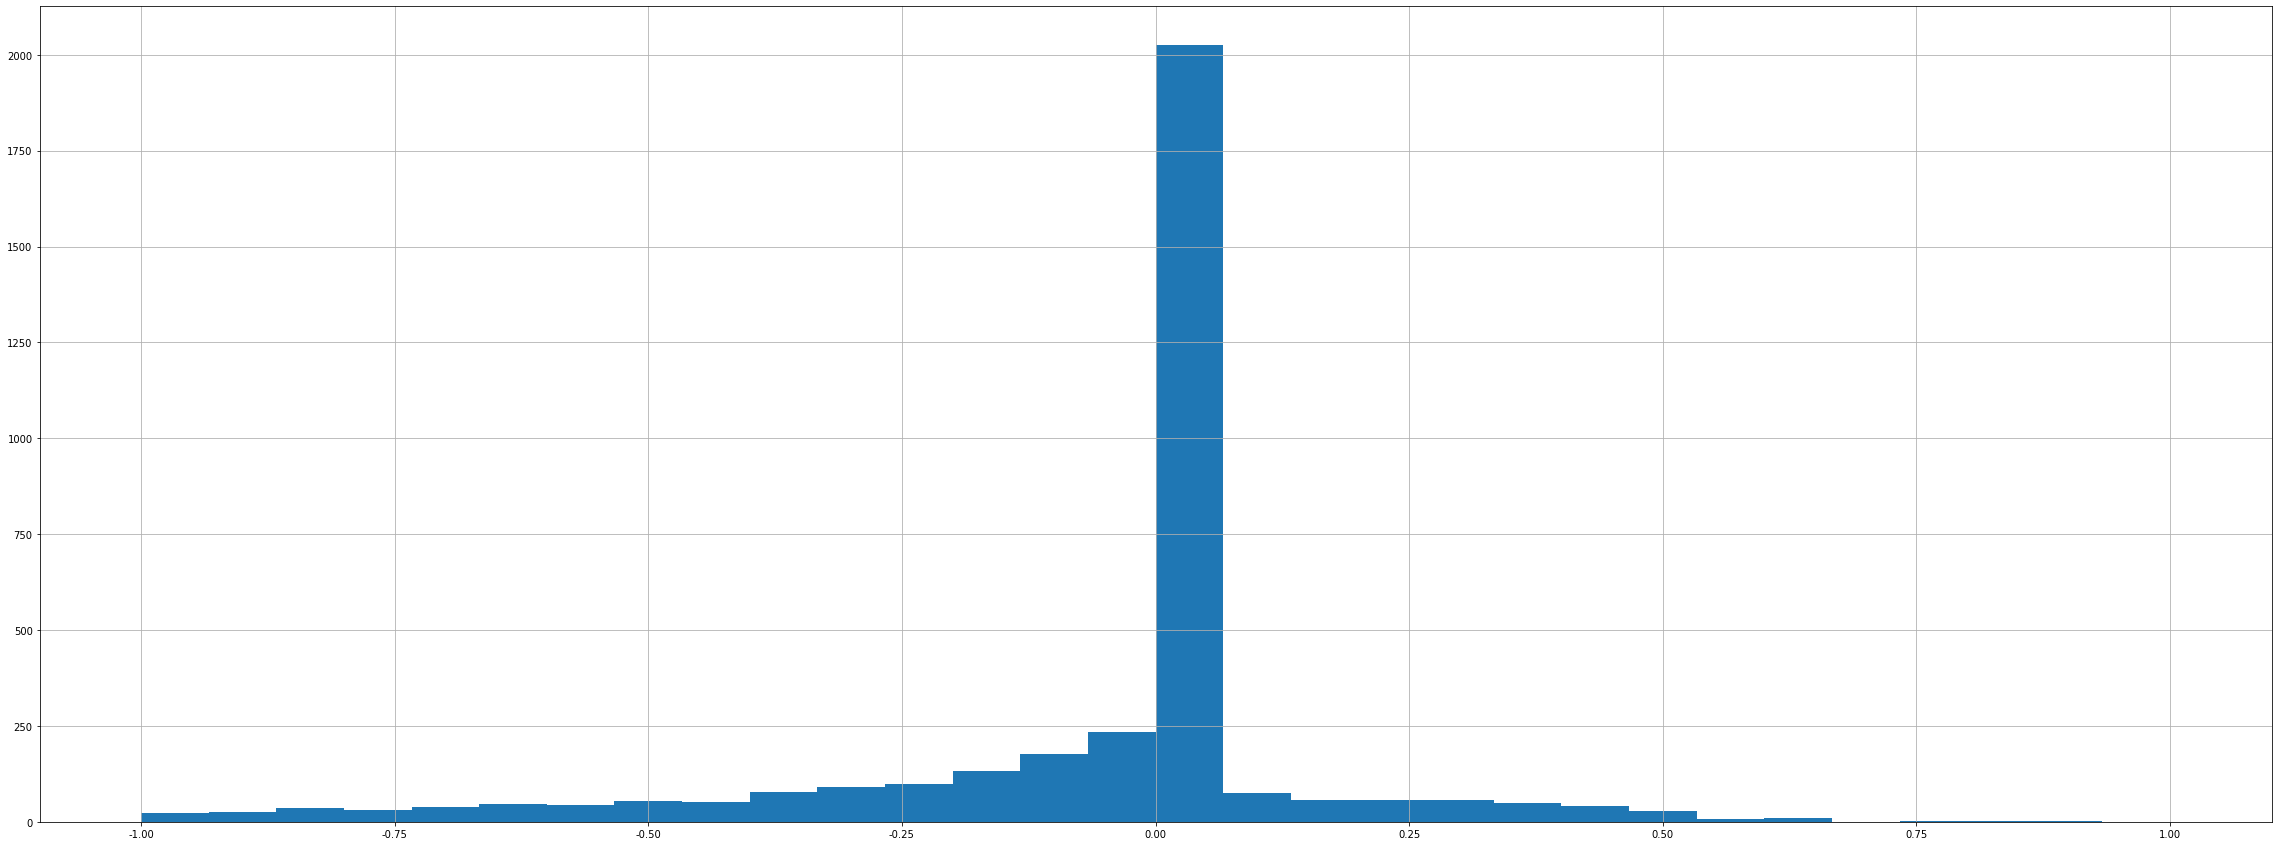

In [ ]:
df_not_zero['customer_cost'].hist(range= (-1,1),figsize = (40,15), bins =30)

0 이하는 위험군, 0.02 이상은 수익군으로 분류

In [ ]:
df_risk_high = df_not_zero[df_not_zero['customer_cost']<0]
df_risk_high['risk'] = 1
# risk 1로 위험군

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_risk_low = df_not_zero[df_not_zero['customer_cost']>0.02]
df_risk_low['risk'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_risk_low.columns

Index(['customer_id', 'req_id', 'insu_req_amount', 'insu_pay_amount',
       'insu_cum_amount', 'insu_duration', 'customer_cost', 'risk'],
      dtype='object')

## 청구금액 0이 아닌 고객 risk column merge

In [ ]:
df_not_zero_risk =pd.merge(df_risk_high,df_risk_low, on =['customer_id', 'req_id', 'insu_req_amount', 'insu_pay_amount',
       'insu_cum_amount', 'insu_duration', 'customer_cost', 'risk'], how = 'outer')

In [ ]:
df_not_zero_risk.isna().sum()

customer_id        0
req_id             0
insu_req_amount    0
insu_pay_amount    0
insu_cum_amount    0
insu_duration      0
customer_cost      0
risk               0
dtype: int64

In [ ]:
df_not_zero_risk

,customer_id,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
0,C112379,C112379-20110314-17403-01-001,623098,1214577.0,1800000,15,-0.949255,1
1,C112404,C112404-20100831-12754-01-001,808750,1008750.0,600000,5,-0.247295,1
2,C112411,C112411-20101111-18755-01-001,333680,553680.0,240000,2,-0.659314,1
3,C112570,C112570-20130716-13737-01-001,2762279,2852279.0,4875000,39,-0.032582,1
4,C112856,C112856-20120717-16134-02-001,234820,314820.0,2875000,23,-0.340686,1
...,...,...,...,...,...,...,...,...
2078,C133614,C133614-20121220-18985-01-001,262570,252570.0,6380000,29,0.038085,0
2079,C133633,C133633-20130806-12110-01-001,325600,296509.0,8360000,38,0.089346,0
2080,C133640,C133640-20121024-13962-01-001,92624,33812.0,6380000,29,0.634954,0
2081,C133760,C133760-20120813-15856-01-001,4808179,2529090.0,1080000,27,0.474003,0


In [ ]:
df_not_zero_risk.groupby('risk').count()

,customer_id,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost
risk,,,,,,,
0,444,444,444,444,444,444,444
1,1639,1639,1639,1639,1639,1639,1639


In [ ]:
df_risk = df_not_zero_risk
df_risk

,customer_id,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
0,C112379,C112379-20110314-17403-01-001,623098,1214577.0,1800000,15,-0.949255,1
1,C112404,C112404-20100831-12754-01-001,808750,1008750.0,600000,5,-0.247295,1
2,C112411,C112411-20101111-18755-01-001,333680,553680.0,240000,2,-0.659314,1
3,C112570,C112570-20130716-13737-01-001,2762279,2852279.0,4875000,39,-0.032582,1
4,C112856,C112856-20120717-16134-02-001,234820,314820.0,2875000,23,-0.340686,1
...,...,...,...,...,...,...,...,...
2078,C133614,C133614-20121220-18985-01-001,262570,252570.0,6380000,29,0.038085,0
2079,C133633,C133633-20130806-12110-01-001,325600,296509.0,8360000,38,0.089346,0
2080,C133640,C133640-20121024-13962-01-001,92624,33812.0,6380000,29,0.634954,0
2081,C133760,C133760-20120813-15856-01-001,4808179,2529090.0,1080000,27,0.474003,0


In [ ]:
df_risk0= df_risk[df_risk['risk']== 0]

In [ ]:
df_risk['risk'].value_counts()

1    1639
0     444
Name: risk, dtype: int64

In [ ]:
df_risk[df_risk['risk'] == 1]

,customer_id,req_id,insu_req_amount,insu_pay_amount,insu_cum_amount,insu_duration,customer_cost,risk
0,C112379,C112379-20110314-17403-01-001,623098,1214577.0,1800000,15,-0.949255,1
1,C112404,C112404-20100831-12754-01-001,808750,1008750.0,600000,5,-0.247295,1
2,C112411,C112411-20101111-18755-01-001,333680,553680.0,240000,2,-0.659314,1
3,C112570,C112570-20130716-13737-01-001,2762279,2852279.0,4875000,39,-0.032582,1
4,C112856,C112856-20120717-16134-02-001,234820,314820.0,2875000,23,-0.340686,1
...,...,...,...,...,...,...,...,...
1634,C134172,C134172-20120418-11473-01-001,62770,262770.0,2700000,27,-3.186235,1
1635,C134188,C134188-20121011-13181-02-001,2923139,6113139.0,1120000,28,-1.091293,1
1636,C134197,C134197-20130403-15406-01-001,1891048,1901048.0,4000000,40,-0.005288,1
1637,C134221,C134221-20130917-12901-02-001,6281720,9951053.0,3600000,36,-0.584129,1


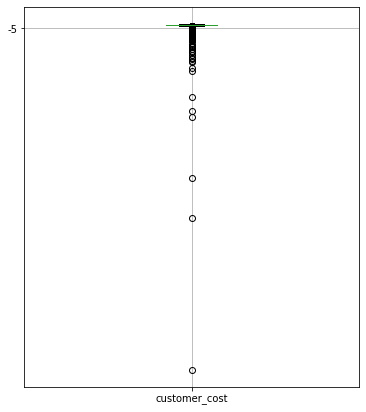

In [ ]:
plt.figure(figsize = (6,7))
boxplot = df_not_zero_risk.boxplot(column = ['customer_cost'])
plt.yticks(np.arange(-5,5, step = 50))
plt.show()

In [ ]:
df_risk['risk'].value_counts()

1    1639
0     444
Name: risk, dtype: int64

## insu_risk csv로 저장


In [ ]:
df_risk.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_risk.csv',encoding = 'euckr')